In [ ]:
# I'm going to make a MarketWatch project using everything I learned in DS3000.

day0. no notes needed

In [ ]:
list_1 = [1, 2, 3, 4, 5]
for item in list_1:
    print(item)

# new functions. enumerate gets both index and value

# some_dict.items()
# dict = {'a': 1, 'b': 2, 'c': 3}


# list(dict_a.keys())[2]
# list(name of the list)[index of the list]
# print(list(dict_a.keys())[2])

# pop can change the list element

In [ ]:
# np logspace 

# transpose exists

# you can transpose up and down using order=F, or left right using
# order=C

# iloc gets a row. just a row. And maybe all columns or not.




In [1]:
import pandas as pd

In [3]:
quiz_dict2 = {'student0': [80, 90, 50],
             'student1': [87, 92, 80]}
quiz_df = pd.DataFrame(quiz_dict2, index=('quiz0', 'quiz1', 'quiz2'))


In [4]:
print(quiz_df)

       student0  student1
quiz0        80        87
quiz1        90        92
quiz2        50        80


In [7]:
# quiz_df.iloc[0].idxmin()
quiz_df.iloc[0].idxmax()

'student1'

In [ ]:
# Data Scraping:

# print df
# for d in dict_list:
#     print(d)



In [21]:
# use pytz for clearing out the python timezone shit
# this gets the current hour in US/Eastern timezone
import pytz, datetime

from datetime import datetime
tz_eta = pytz.timezone('US/Eastern')

# print(datetime.now(tz_eta).hour)

# The format string 'The time as of now is %B-%d-%Y %I:%M %p' breaks down as:
# %B = Full month name (September)
# %d = Day of month as zero-padded number (30)
# %Y = Year with century (2024)
# %I = Hour (12-hour clock) as zero-padded number (09)
# %M = Minute as zero-padded number (20)
# %p = AM/PM (PM)

# This line demonstrates parsing a formatted date string into a datetime object
# The strptime() method takes:
# 1. A string containing a date/time ('The time as of now is September-30-2024 9:20 PM')
# 2. The format pattern that matches the string structure ('The time as of now is %B-%d-%Y %I:%M %p')
# And converts it into a datetime object that can be used for calculations
print(datetime.strptime('The time as of now is September-30-2024 9:20 PM', 'The time as of now is %B-%d-%Y %I:%M %p'))


2024-09-30 21:20:00


In [32]:
# Series is a one-dimensional array that can hold data of any type
# has array of actual data. Associated array of data labels called index

quiz_dict = {
    'student0': [80, 90, 50],
    'student1': [87, 92, 80],
    'student2': [75, 85, 70]
}

df_quiz = pd.DataFrame(quiz_dict, index=('quiz0', 'quiz1', 'quiz2'))

print(df_quiz)

# axis=1 means operate on columns, axis=0 means operate on rows
# So this drops the 'student0' column from the dataframe
df_quiz.drop('student0', axis=1)  # axis=1 for columns, axis=0 for rows
df_quiz.drop('quiz0', axis=0)

       student0  student1  student2
quiz0        80        87        75
quiz1        90        92        85
quiz2        50        80        70


,student0,student1,student2
quiz1,90,92,85
quiz2,50,80,70


In [33]:
api_key = 'cf758020c3c57082bbfd8b62d88ca683'

# north = positive, south = negative
lat = 42.3601
# west = positive, east = negative
lon = -71.0589

units = 'imperial'
url = f'https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&appid={api_key}&units={units}'

print(url)


https://api.openweathermap.org/data/3.0/onecall?lat=42.3601&lon=-71.0589&appid=cf758020c3c57082bbfd8b62d88ca683&units=imperial


In [37]:
def openweather_onecall(latlon_tuple, api_key, units='imperial'):
    """ returns weather data from one location via onecall
    
    https://openweathermap.org/api/one-call-api 
    
    Args:
        latlon_tuple (tuple): first element is lattitude,
            second is longitude            
        api_key (str): API key required to access data
        units (str): 'imperial', 'standard', 'metric'
        
    Returns:
        weather_dict (dict): a nested dictionary (tree) which
            contains weather data
    """
    pass
latlon_tuple = 42.3601, -71.0589

# get data from openweathermap
weather_dict = openweather_onecall(latlon_tuple, units='imperial', api_key=api_key)

print(weather_dict)

None


In [44]:
import pandas as pd
import requests

tables = requests.get('https://www.marketwatch.com/',headers='')

print(tables.text)
# 401 error we need beautifulsoup instead

<html lang="en"><head><title>marketwatch.com</title><style>#cmsg{animation: A 1.5s;}@keyframes A{0%{opacity:0;}99%{opacity:0;}100%{opacity:1;}}</style></head><body style="margin:0"><p id="cmsg">Please enable JS and disable any ad blocker</p><script data-cfasync="false">var dd={'rt':'c','cid':'AHrlqAAAAAMANU_qRNunZ0EAmyGEDg==','hsh':'D428D51E28968797BC27FB9153435D','t':'bv','qp':'','s':47891,'e':'dc455d0ed0d530af9213de408d2385b44f41d9a0796d4560ff02d5564a93e73a','host':'geo.captcha-delivery.com','cookie':'TuVcqPTa9qiFJQ6~~izoVcMAzXOc4ToWDmggD3m5pdDg8dQ3FyQsGcjcuFhjPCnKxhFJJlj9F0eZM7VgDa9PlMpZTT7wIe8aCkjiK2x8fsSkpRGCube9yk6Uyp78J0py'}</script><script data-cfasync="false" src="https://ct.captcha-delivery.com/c.js"></script></body></html>


In [55]:
from bs4 import BeautifulSoup

url = 'https://www.marketwatch.com/'

str_html = requests.get(url).text
soup = BeautifulSoup(str_html)

# print(str(soup).replace('\n', ' '))
# how do I display this stuff, in a larger format
soup.find_all('script')

[<script data-cfasync="false">var dd={'rt':'c','cid':'AHrlqAAAAAMArIY9mQa9ZMMAmyGEDg==','hsh':'D428D51E28968797BC27FB9153435D','t':'bv','qp':'','s':47891,'e':'ec616ea17794b5a34c072d78cd2316b4069e69c54904b9501b2b4817a2ecd189','host':'geo.captcha-delivery.com','cookie':'vG3GrUG01IUXbWW7RF_NfCxTdMSG5DH3QXljodHniF7xrWZfmJSnNn4yXtJM7kYoYI9dgj9AD0Kg972Lwp3I5X_HeAOqJ5mKwmCdZlUza9Hp8cuRNej7ZD0gssqKCXxz'}</script>,
 <script data-cfasync="false" src="https://ct.captcha-delivery.com/c.js"></script>]

In [56]:
# identifying tags
url = 'https://www.allrecipes.com/search?q=cheese+fondue'
response = requests.get(url)
soup = BeautifulSoup(response.text)

soup

<!DOCTYPE html>
<html class="comp searchTemplate static-html html mntl-html no-js" data-ab="99,71,99,99,99,99,99,99,99,99,99,62,99,99,99,99,77,99,99,99,99,85,99,58,78,99,64" data-allrecipes-resource-version="2.177.0" data-ddm-standard-tracking="true" data-mantle-resource-version="4.0.828" data-mm-ads-resource-version="2.0.29" data-mm-digital-issues-resource-version="1.18.11" data-mm-myrecipes-resource-version="1.4.15" data-mm-recipes-resource-version="1.3.21" data-mm-transactional-resource-version="1.16.19" data-mm-video-resource-version="1.4.24" data-resource-version="2.177.0" data-tracking-container="true" id="searchTemplate_1-0" lang="en"><!--
<globe-environment environment="k8s-prod" application="allrecipes" dataCenter="us-east-1"/>
-->
<head class="loc head">
<link href="//js-sec.indexww.com" rel="preconnect"/>
<link href="//c.amazon-adsystem.com" rel="preconnect"/>
<link href="//securepubads.g.doubleclick.net" rel="preconnect"/>
<link href="//www.google-analytics.com" rel="dnspre

In [69]:
tables = requests.get('https://www.marketwatch.com/',headers='')

soup = BeautifulSoup(tables.text)

soup

# Find the markets group tbody first
markets_group = soup.find('tbody', class_='markets__group')

if markets_group:
    # Then find all table rows within that tbody
    stock_list = markets_group.find_all('tr', class_='table__row')
else:
    stock_list = []


stock_list = soup.find_all(class_='table__row')
len(stock_list)

0

In [66]:
print(stock_list)

[]


In [ ]:
# # href to dataframe
# example_dict = {'col1': [1,2,3,4,5],
#                 'col2': [6,7,8,9,10],
#                 'col3': ['who', 'what', 'when', 'where', 'why']}
# pd.DataFrame.from_dict(example_dict)

# df1=extract_recipes(meatloaf_html)

def crawl_recipes(query):
    """ gets html of from allrecipes.com to search query 
    Args:
        query (str): search string      
    Returns:
        html_str (str): html response from allreceipes.com
    """

    query = query.replace(" ", "+")
    url = f'https://www.allrecipes.com/search?q={query}'
    return requests.get(url).text
print(crawl_recipes('cheese fondue'))


<!DOCTYPE html>
<html id="searchTemplate_1-0" class="comp searchTemplate static-html html mntl-html no-js " data-mm-ads-resource-version="2.0.29" data-mm-video-resource-version="1.4.24" data-mm-myrecipes-resource-version="1.4.15" data-mantle-resource-version="4.0.828" data-allrecipes-resource-version="2.177.0" data-ab="99,70,99,99,99,99,99,99,99,99,99,99,62,99,99,99,99,77,99,99,99,99,85,99,58,78,99,64" data-mm-transactional-resource-version="1.16.19" data-mm-digital-issues-resource-version="1.18.11" lang="en" data-tracking-container="true" data-resource-version="2.177.0" data-ddm-standard-tracking="true" data-mm-recipes-resource-version="1.3.21"><!--
<globe-environment environment="k8s-prod" application="allrecipes" dataCenter="us-east-1"/>
-->
<head class="loc head">
<link rel="preconnect" href="//js-sec.indexww.com">
<link rel="preconnect" href="//c.amazon-adsystem.com">
<link rel="preconnect" href="//securepubads.g.doubleclick.net">
<link rel="dnsprefetch" href="//www.google-analyti

In [81]:
def extract_recipes(text):
    soup = BeautifulSoup(text)
    recipe_list = []

    for recipe in soup.find_all(class_='card__title-text'):
        recipe = recipe.text
        print(recipe)
        recipe_list.append(recipe)

    return recipe_list

extract_recipes(crawl_recipes('cheese fondue'))

Cheese Fondue
Best Formula Three-Cheese Fondue
Beer Cheese Fondue
Classic Cheese Fondue
Cheese Fondue
Chef John's Classic Cheese Fondue Is the Ultimate Cheese Lover's Recipe
Basic Fondue
Quick Fontina Cheese Fondue
Classic Swiss Fondue
YouTube + Chill: For Serious Cheese-Lovers Only
Crab Cheese Fondue
Cheese
25 Best Appetizers to Make if You Absolutley Love Cheese
The Most Popular Recipes of the 1970s
How to Make Cheese Sauce From Scratch
What Is Gruyère Cheese and What Does It Taste Like?
Tarek's Irish Stout Fondue
Parmesan Fondue
Shrimp Fondue
Cheddar-Beer Fondue
Easy Pizza Fondue
16 Retro Diner Dinner Recipes
Why Do Some Cheeses Melt Better Than Others?
19 Retro Recipes so You and Mom Can Cook up Some Nostalgia


['Cheese Fondue',
 'Best Formula Three-Cheese Fondue',
 'Beer Cheese Fondue',
 'Classic Cheese Fondue',
 'Cheese Fondue',
 "Chef John's Classic Cheese Fondue Is the Ultimate Cheese Lover's Recipe",
 'Basic Fondue',
 'Quick Fontina Cheese Fondue',
 'Classic Swiss Fondue',
 'YouTube + Chill: For Serious Cheese-Lovers Only',
 'Crab Cheese Fondue',
 'Cheese',
 '25 Best Appetizers to Make if You Absolutley Love Cheese',
 'The Most Popular Recipes of the 1970s',
 'How to Make Cheese Sauce From Scratch',
 'What Is Gruyère Cheese and What Does It Taste Like?',
 "Tarek's Irish Stout Fondue",
 'Parmesan Fondue',
 'Shrimp Fondue',
 'Cheddar-Beer Fondue',
 'Easy Pizza Fondue',
 '16 Retro Diner Dinner Recipes',
 'Why Do Some Cheeses Melt Better Than Others?',
 '19 Retro Recipes so You and Mom Can Cook up Some Nostalgia']

In [83]:
meatloaf_html = crawl_recipes('meatloaf')
print(meatloaf_html)

<!DOCTYPE html>
<html id="searchTemplate_1-0" class="comp searchTemplate static-html html mntl-html no-js " data-mm-ads-resource-version="2.0.29" data-mm-video-resource-version="1.4.24" data-mm-myrecipes-resource-version="1.4.15" data-mantle-resource-version="4.0.828" data-allrecipes-resource-version="2.177.0" data-ab="99,71,99,99,99,99,99,99,99,99,99,62,99,99,99,99,77,99,99,99,99,85,99,58,78,99,64" data-mm-transactional-resource-version="1.16.19" data-mm-digital-issues-resource-version="1.18.11" lang="en" data-tracking-container="true" data-resource-version="2.177.0" data-ddm-standard-tracking="true" data-mm-recipes-resource-version="1.3.21"><!--
<globe-environment environment="k8s-prod" application="allrecipes" dataCenter="us-east-1"/>
-->
<head class="loc head">
<link rel="preconnect" href="//js-sec.indexww.com">
<link rel="preconnect" href="//c.amazon-adsystem.com">
<link rel="preconnect" href="//securepubads.g.doubleclick.net">
<link rel="dnsprefetch" href="//www.google-analytics.

In [109]:
url = 'https://www.allrecipes.com/recipe/283561/classic-cheese-fondue/'

# info_str.split("   ")[0].split(':')

def extract_prep_info(url):
    # html = requests.get(url).text
    # soup = BeautifulSoup(html)

    # prep_str = soup.find_all(class_='mm-recipe-details__content')[0].text.strip().replace('\n',' ')
    # prep_dict = dict()

    # for line in prep_str.split('   '):
    #     print(line)
    html = requests.get(url).text
    soup = BeautifulSoup(html)
    prep_dict = dict()
    for i2 in range(len(soup.find_all(class_='mm-recipes-structured-ingredients__list-item'))):
        prep_str = soup.find_all(class_='mm-recipes-structured-ingredients__list-item')[i2].text.strip()
        print(prep_str)
        print(prep_dict)
        for i,line in enumerate(prep_str.split('   ')):
            print(line)
        
            # line_list = line.split(':')
            print(line)

            prep_dict[i] = line[0].strip()
            print(prep_dict)


extract_prep_info(url)

1 ¼ cups dry white wine (such as Sauvignon Blanc)
{}
1 ¼ cups dry white wine (such as Sauvignon Blanc)
1 ¼ cups dry white wine (such as Sauvignon Blanc)
{0: '1'}
1 tablespoon kirsch (cherry brandy)
{0: '1'}
1 tablespoon kirsch (cherry brandy)
1 tablespoon kirsch (cherry brandy)
{0: '1'}
1 clove garlic, slightly crushed
{0: '1'}
1 clove garlic, slightly crushed
1 clove garlic, slightly crushed
{0: '1'}
1 pinch cayenne pepper
{0: '1'}
1 pinch cayenne pepper
1 pinch cayenne pepper
{0: '1'}
1 pinch freshly grated nutmeg
{0: '1'}
1 pinch freshly grated nutmeg
1 pinch freshly grated nutmeg
{0: '1'}
4 teaspoons cornstarch
{0: '1'}
4 teaspoons cornstarch
4 teaspoons cornstarch
{0: '4'}
8 ounces shredded Gruyère cheese
{0: '4'}
8 ounces shredded Gruyère cheese
8 ounces shredded Gruyère cheese
{0: '8'}
8 ounces shredded Emmentaler cheese
{0: '8'}
8 ounces shredded Emmentaler cheese
8 ounces shredded Emmentaler cheese
{0: '8'}


In [115]:

# extract nutrition

# extract a data frame of recipes. Only name and href

# def extract_nutrition(url):


# str_query = 'boston cream pie'
# html_str = crawl_recipes(str_query)
# df_recipe = extract_recipes(html_str)
# df_recipe = df_recipe.rename(columns={0: 'name', 1:'href'})

def extract_nutrition(url):
    html = requests.get(url).text
    soup = BeautifulSoup(html)

    nutrition_dictionary = dict()
    nutrition_list = soup.find_all('span', class_='mm-recipes-nutrition-facts-label__nutrient-name mm-recipes-nutrition-facts-label__nutrient-name--has-postfix')
    for nutrition_info in nutrition_list:
        # next_sibling gets the text value that appears right after the nutrition label
        # For example, if the HTML is: <span class="label">Total Fat</span>14g
        # then next_sibling would get "14g"
        a = nutrition_info.next_sibling  # Gets the amount (e.g. "14g") that follows the nutrition label
        nutrition_dictionary[nutrition_info.text] = a.strip()
    return nutrition_dictionary

extract_nutrition(url)

{'Total Fat': '14g',
 'Saturated Fat': '9g',
 'Cholesterol': '46mg',
 'Sodium': '179mg',
 'Total Carbohydrate': '3g',
 'Total Sugars': '1g',
 'Protein': '13g',
 'Vitamin C': '0mg',
 'Calcium': '461mg',
 'Iron': '0mg',
 'Potassium': '67mg'}

In [116]:
# df1 = df_korea.groupby('region')

# print(df1.Birth.max())

NameError: name 'df_korea' is not defined

In [123]:
# df_korea = pd.read_csv('korea_demo.zip')
# print(df_korea)

# get a dataset from kaggle and plot it in here

bodyfat_plotting = pd.read_csv('bodyfat.csv')
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns




Text(0, 0.5, 'count')

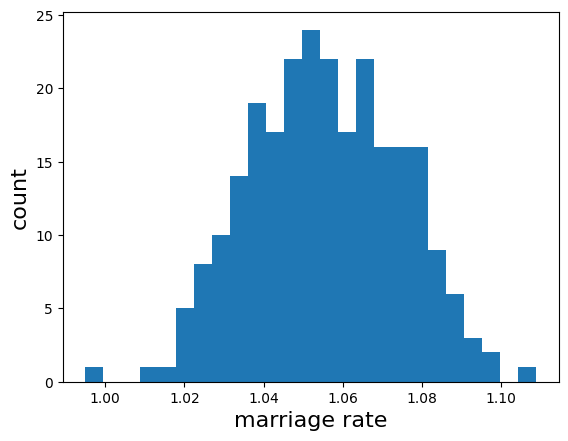

In [130]:
plt.hist(bodyfat_plotting['Density'], bins = 25)
plt.xlabel('marriage rate', fontsize = 16)
plt.ylabel('count', fontsize = 16)

[1.0708, 1.0853, 1.0414, 1.0751, 1.034, 1.0502, 1.0549, 1.0704, 1.09, 1.0722, 1.083, 1.0812, 1.0513, 1.0505, 1.0484, 1.0512, 1.0333, 1.0468, 1.0622, 1.061, 1.0551, 1.064, 1.0631, 1.0584, 1.0668, 1.0911, 1.0811, 1.091, 1.079, 1.0716, 1.0862, 1.0719, 1.0263, 1.0101, 1.0438, 1.0346, 1.0202, 1.0258, 1.0217, 1.025, 1.0279, 1.0269, 1.0814, 1.067, 1.0742, 1.0665, 1.0678, 1.0903, 1.0756, 1.084, 1.0807, 1.0848, 1.0906, 1.0473, 1.0524, 1.0356, 1.028, 1.043, 1.0396, 1.0317, 1.0298, 1.0403, 1.0264, 1.0313, 1.0499, 1.0673, 1.0847, 1.0693, 1.0439, 1.0788, 1.0796, 1.068, 1.072, 1.0666, 1.0483, 1.0498, 1.056, 1.0283, 1.0382, 1.0568, 1.0377, 1.0378, 1.0386, 1.0648, 1.0462, 1.08, 1.052, 1.0573, 1.0795, 1.0424, 1.0785, 1.0991, 1.077, 1.073, 1.0582, 1.0506, 1.053, 1.048, 1.0412, 1.0578, 1.0547, 1.0569, 1.0593, 1.05, 1.0538, 1.0355, 1.0486, 1.0503, 1.0384, 1.0607, 1.0529, 1.0671, 1.0404, 1.0575, 1.0358, 1.0652, 1.0623, 1.0674, 1.0587, 1.0373, 1.059, 1.0515, 1.0472, 1.0452, 1.0398, 1.0435, 1.0374, 1.0491, 1

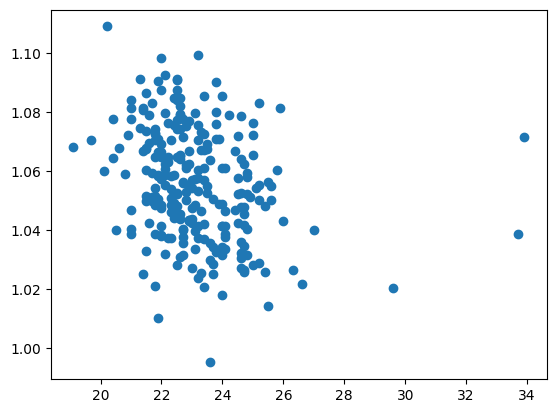

In [134]:
# unique removes dupes and converts array into Python list

region_list = bodyfat_plotting['Density'].unique().tolist()
print(region_list)

plt.scatter(bodyfat_plotting['Ankle'], bodyfat_plotting['Density'])


In [ ]:
# just plot using color=???